# Building A Handwritten Digits Classifier

In this project I've used load_digits dataset from sklearn.datasets package and tried applying different models on data to check their overall accuracy. 
As linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption, so I used that.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data= load_digits()
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

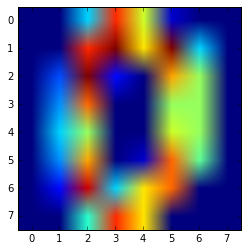

In [4]:
%matplotlib inline
plt.imshow(data.images[0])

In [5]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df= pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df.shape

(1797, 64)

In [8]:
labels= pd.Series(data.target)
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

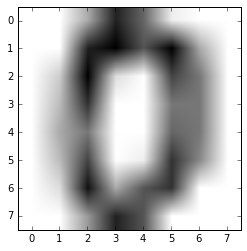

In [9]:
first_image = df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

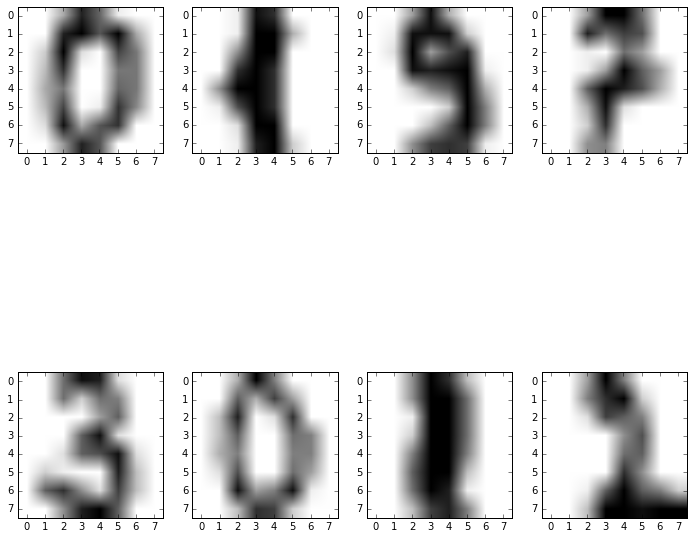

In [10]:
fig= plt.figure(figsize=(12,12))
row=[0,99,199,299,999,1099,1199,1299]
for sp in range(0,8):    
    ax= fig.add_subplot(2,4,sp+1)
    image= df.iloc[row[sp]]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    ax.imshow(np_image, cmap='gray_r')
plt.show()                 

### K-Nearest Neighbors Model

In [11]:
X= df
y= labels

In [12]:
knn= KNeighborsClassifier()
k_values= list(range(4,10))
knn_scores= list()
for i in k_values:
    kf= KFold(i,True,1)
    knn_score= cross_val_score(knn, X, y, cv= kf, scoring= 'accuracy')    
    knn_mean= np.mean(knn_score)
    knn_scores.append(round(knn_mean,3))
knn_scores


[0.983, 0.984, 0.986, 0.985, 0.986, 0.987]

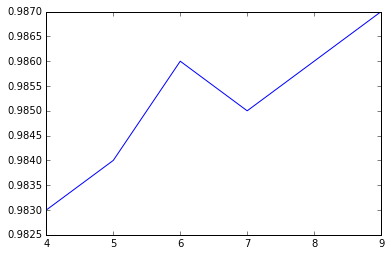

In [13]:
k_values= list(range(4,10))
plt.plot(k_values, knn_scores)

## Neural Network With One Hidden Layer with (4)k-fold cross validation 

In [14]:
# Train function
def train(neurons, train_features, train_labels):
    nn= MLPClassifier(hidden_layer_sizes= neurons)
    nn.fit(train_features, train_labels)
    return nn

In [15]:
# test function
def test(model, test_features, test_labels):
    nn_pred= model.predict(test_features)
    new_df= pd.DataFrame()
    new_df['True_labels']= test_labels
    new_df['Predicted_labels']= nn_pred
    accuracy= sum((new_df['True_labels']== new_df['Predicted_labels']))/ len(new_df)
    return accuracy

In [16]:
def cross_validation(k):
    accuracy_scores= list()
    kf = KFold(4,True,2)
    for train_i,test_i in kf.split(X):
        train_features, test_features= X.loc[train_i], X.loc[test_i]
        train_labels, test_labels= y.loc[train_i], y.loc[test_i]
        model= train(k, train_features, train_labels)
        accuracy= test(model, test_features, test_labels)
        accuracy_scores.append(accuracy)
    return  accuracy_scores  

In [17]:
accuracy= cross_validation(1)
mean_acc= np.mean(accuracy)
mean_acc

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.21366740905716408

In [18]:
neurons= [8,16,32,64,128,256]
final_accuracy= list()
for i in neurons:
    accuracy= cross_validation(i)
    mean_acc= np.mean(accuracy)
    final_accuracy.append(mean_acc)
final_accuracy    

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.9142910170749815,
 0.9549307102202426,
 0.9621628309824302,
 0.9671739668398911,
 0.9710690423162583,
 0.9732962138084632]

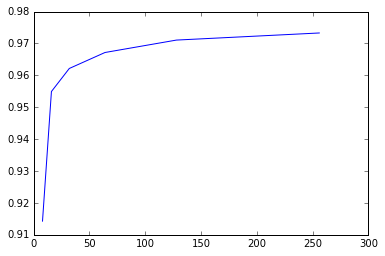

In [19]:
plt.plot(neurons, final_accuracy)

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 91% to approximately 97%. But K-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

##  Neural Network With Two Hidden Layers

In [20]:
neurons= [(64,64),
    (128, 128),
    (256, 256)]
final_accuracy= list()
for i in neurons:
    accuracy= cross_validation(i)
    mean_acc= np.mean(accuracy)
    final_accuracy.append(mean_acc)
final_accuracy    

[0.9677307597129424, 0.9805283345706508, 0.9788591932689927]

Using 2 hidden layers improved our simple accuracy to 97% same as single hidden layer gave. It means using more hidden layers increased the amount of overfitting that happens. 

## Neural Network With Three Hidden Layers with (6)k-fold cross validation 

In [21]:
def cross_validation_6(k):
    accuracy_scores= list()
    kf = KFold(6,True,2)
    for train_i,test_i in kf.split(X):
        train_features, test_features= X.loc[train_i], X.loc[test_i]
        train_labels, test_labels= y.loc[train_i], y.loc[test_i]
        model= train(k, train_features, train_labels)
        accuracy= test(model, test_features, test_labels)
        accuracy_scores.append(accuracy)
    return  accuracy_scores  

In [22]:
neurons_3= [(10,10,10),
    (64,64,64),
    (128,128,128),]
final_accuracy_3= list()
for i in neurons:
    accuracy= cross_validation_6(i)
    mean_acc= np.mean(accuracy)
    final_accuracy_3.append(mean_acc)
final_accuracy_3   

[0.9688405797101449, 0.976079524340394, 0.98053325901152]

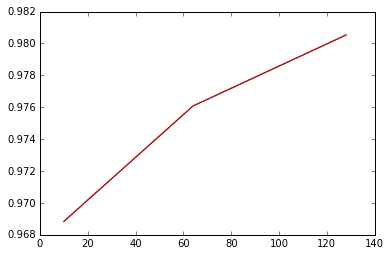

In [23]:
plt.plot(neurons_3, final_accuracy_3)

Using 3 hidden layers improved our simple accuracy to 97%, even with 6-fold cross validation. Having more layers and more neurons tends to improve the network's performance at some instance.